<h1><center>Product Amount Forecast by Time</center></h1>

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## 2. Data

In [ ]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


## 3. Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [9]:
df.shape

(573, 1)

In [7]:
df.columns = ['Production']

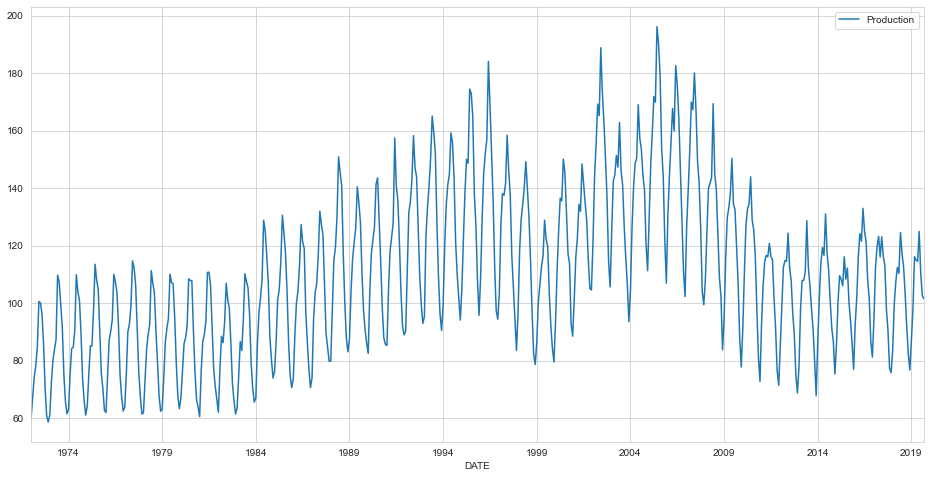

In [8]:
df.plot(figsize=(16,8));

## 4. Preprocessing of Data

### 4.1. Train Test Split

In [10]:
len(df)

573

In [11]:
test_size = 24

In [12]:
test_ind = len(df)- test_size
test_ind

549

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [15]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### 4.2. Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## 5. Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, 
                                batch_size = batch_size)

In [21]:
len(generator)

537

In [22]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [23]:
X, y = generator[0]

In [24]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## 6. Modelling & Model Performance

### 6.1. Import related libraries

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### 6.2. Creating Model

### 6.2.1. with "tanh" activation function

In [26]:
n_features = train_scaled.shape[1]

In [27]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, 
               input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

2022-03-21 23:27:05.112102: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

In [31]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, 
                                           batch_size = batch_size)

In [32]:
len(validation_generator)

12

In [33]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 11s 13ms/step - loss: 0.0199 - val_loss: 0.0089
Epoch 2/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 3/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 4/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 5/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 6/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 7/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/20
537/537 [==============================] - 7s 13ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 10/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0033 - val_l

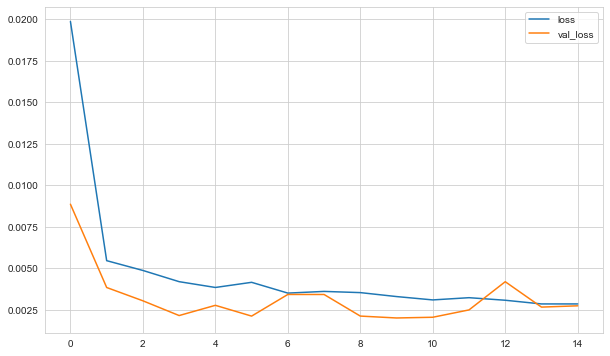

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### 6.2.1.1. Evaluate on Test Data

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [37]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)    
    predictions_scaled.append(current_pred[0])     
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [38]:
predictions_scaled

[array([0.2399088], dtype=float32),
 array([0.24367861], dtype=float32),
 array([0.29654086], dtype=float32),
 array([0.3725248], dtype=float32),
 array([0.44546893], dtype=float32),
 array([0.506776], dtype=float32),
 array([0.551425], dtype=float32),
 array([0.56731546], dtype=float32),
 array([0.54384005], dtype=float32),
 array([0.47789752], dtype=float32),
 array([0.38715592], dtype=float32),
 array([0.3021834], dtype=float32)]

In [39]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.29166886633174616 
mae: 0.1064858852684934 
mse: 0.016107935873002483 
rmse: 0.12691704327237727


#### 6.2.1.2. Inverse Transformations and Comparing

In [40]:
predictions = scaler.inverse_transform(predictions_scaled)

#### 6.2.1.3. Calculation R2 Score and Error Metrics

In [41]:
compare = test[:12]

In [42]:
compare['Predictions'] = predictions

In [43]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,91.651
2017-11-01,77.438,92.169
2017-12-01,75.812,99.438
2018-01-01,83.434,109.887
2018-02-01,99.490,119.918
2018-03-01,107.315,128.349
2018-04-01,112.431,134.488
2018-05-01,110.354,136.674
2018-06-01,124.584,133.445


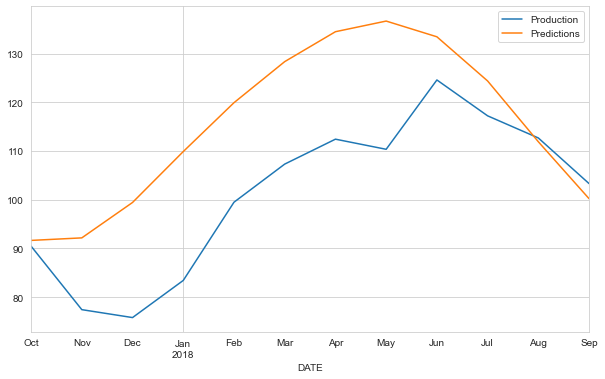

In [44]:
compare.plot();

In [45]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: -0.2916688663317457 
mae: 14.643289378223066 
mse: 304.602238296042 
rmse: 17.45285759685336


### 6.2.2. with "relu" activation function

In [48]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, 
                                batch_size = batch_size)

In [49]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, 
               input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [50]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, 
                                           batch_size = batch_size)

In [53]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 8s 12ms/step - loss: 0.0275 - val_loss: 0.0127
Epoch 2/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0117 - val_loss: 0.0017
Epoch 3/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0073 - val_loss: 0.0016
Epoch 4/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 5/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 6/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 7/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 8/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 9/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 10/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0034 - val_lo

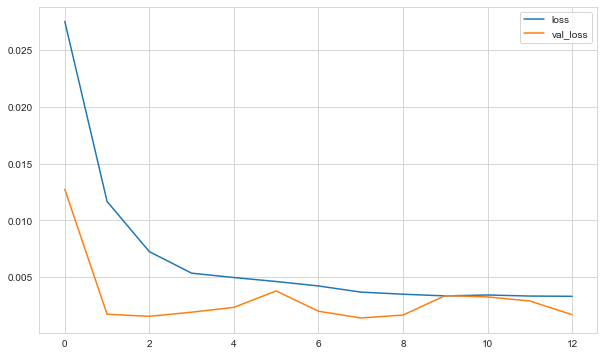

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### 6.2.2.1. Evaluate on Test Data

In [55]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)    
    predictions_scaled.append(current_pred[0])     
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [56]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7702123284989482 
mae: 0.04959177578973473 
mse: 0.0028655990505192315 
rmse: 0.05353129038720467


#### 6.2.2.2. Inverse Transformations and Comparing

In [57]:
predictions = scaler.inverse_transform(predictions_scaled)

#### Calculation R2 Score and Error Metrics

In [58]:
compare = test[:12]

In [59]:
compare['Predictions'] = predictions

In [60]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,93.446
2017-11-01,77.438,86.005
2017-12-01,75.812,86.224
2018-01-01,83.434,96.241
2018-02-01,99.490,105.864
2018-03-01,107.315,113.055
2018-04-01,112.431,117.172
2018-05-01,110.354,118.967
2018-06-01,124.584,118.963


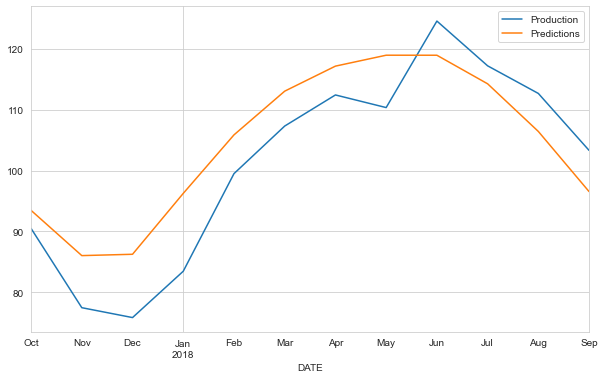

In [61]:
compare.plot();

In [62]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.7702123284989484 
mae: 6.819558496771999 
mse: 54.18868635491217 
rmse: 7.361296513177021


## 7. Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [63]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [64]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, 
                                batch_size = batch_size)

In [65]:
len(df)

573

In [66]:
len(generator)

561

In [67]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, 
               input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [69]:
model.fit_generator(generator,
                    epochs = 20)

Epoch 1/20
561/561 [==============================] - 6s 10ms/step - loss: 0.0067
Epoch 2/20
561/561 [==============================] - 7s 13ms/step - loss: 0.0057
Epoch 3/20
561/561 [==============================] - 7s 13ms/step - loss: 0.0060
Epoch 4/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0053
Epoch 5/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0053
Epoch 6/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0045
Epoch 7/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0042
Epoch 8/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0038
Epoch 9/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0037
Epoch 10/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0031
Epoch 11/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0032
Epoch 12/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0030
Epoch 13/20
5

In [70]:
scaled_full_data.shape

(573, 1)

In [71]:
scaled_full_data[-length:].shape

(12, 1)

In [72]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)
    forecast.append(current_pred[0]) 
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [73]:
forecast = scaler.inverse_transform(forecast)

In [74]:
forecast

array([[ 89.86585288],
       [ 82.91548642],
       [ 80.73137996],
       [ 92.85860024],
       [104.8268316 ],
       [113.84718305],
       [118.82531148],
       [122.30093322],
       [123.50334675],
       [119.86772998],
       [112.39131426],
       [103.10193836]])

In [75]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [76]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [77]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [78]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [79]:
forecast_df

,Forecast
2019-10-01,89.866
2019-11-01,82.915
2019-12-01,80.731
2020-01-01,92.859
2020-02-01,104.827
2020-03-01,113.847
2020-04-01,118.825
2020-05-01,122.301
2020-06-01,123.503
2020-07-01,119.868


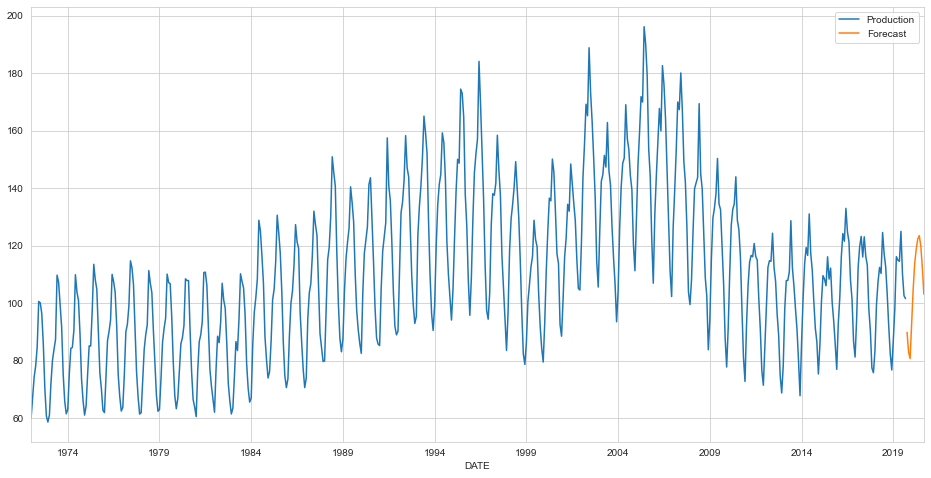

In [82]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

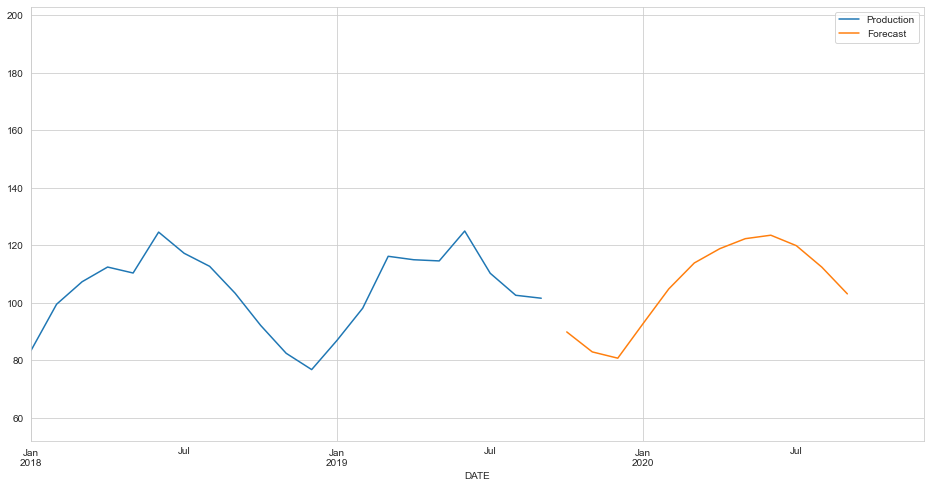

In [84]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01');